## Sales Analysis
  

In [131]:
import pandas as pd 
import os
import glob

### Merging 12 months of sales data into a single file 

In [132]:
path = 'C:\Pandas\Business_analysis\Sales_Data'
all_files = glob.glob(path+"/*.csv")
df = pd.concat(map(pd.read_csv,all_files))
df.head(5)
#li = []

#for file in all_files:
#    df = pd.read_csv(file, index_col=None)
#    li.append(df)

#all_data=pd.concat(li, ignore_index=True)
#all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### SAVING THE MERGED DATA TO A NEW FILE 

In [133]:
df.to_csv("all_data.csv")

#reading in updated data frame
all_data =pd.read_csv("all_data.csv")
all_data.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### cLEAN UP THE DATA

#### dROP NaN rows

In [134]:
nan_df = all_data[all_data.isnull().any(axis=1)]
nan_df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,1,NaN,NaN,NaN,NaN,NaN,NaN
356,356,NaN,NaN,NaN,NaN,NaN,NaN
735,735,NaN,NaN,NaN,NaN,NaN,NaN
1433,1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185176,10012,NaN,NaN,NaN,NaN,NaN,NaN
185438,10274,NaN,NaN,NaN,NaN,NaN,NaN
186042,10878,NaN,NaN,NaN,NaN,NaN,NaN
186548,11384,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
all_data.dropna(how='all')
all_data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186845,11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Find 'Or' and delete it 

In [136]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [137]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186845,11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [138]:
all_data.drop(index=1)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186845,11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Convert columns to correct data type  

In [139]:
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

<ipython-input-139-9e618ac887ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])
<ipython-input-139-9e618ac887ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


## Question1: Which was the best month for sales? how much was earned that month???

#### AUGMENTING ADDITIONAL COLUMN FOR MONTH

In [140]:
all_data['Month'] =all_data['Order Date'].str[0:2]
all_data.head(5)

<ipython-input-140-a9ca4de621a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] =all_data['Order Date'].str[0:2]


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


#### Convert Month from str to int

In [141]:
all_data['Month'] = pd.to_numeric(all_data['Month'])
all_data.head(5)

<ipython-input-141-ac056830a17b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = pd.to_numeric(all_data['Month'])


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0
3,3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
4,4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0


#### Converted price and quant to int and multiplied to find the total sales  

In [152]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,sales
0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,Dallas,23.90
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,Boston,99.99
3,3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles,600.00
4,4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles,11.99


### BEst month for sale

In [143]:
result = all_data.groupby(['Month']).sum( )
result

,Unnamed: 0,Quantity Ordered,Price Each,sales
Month,,,,
1.0,47433245,10903.0,1.811768e+06,1.822257e+06
2.0,72123197,13449.0,2.188885e+06,2.202022e+06
3.0,115333587,17005.0,2.791208e+06,2.807100e+06
4.0,167977608,20558.0,3.367671e+06,3.390670e+06
5.0,137829259,18667.0,3.135125e+06,3.152607e+06
6.0,92330356,15253.0,2.562026e+06,2.577802e+06
7.0,102752005,16072.0,2.632540e+06,2.647776e+06
8.0,71824951,13448.0,2.230345e+06,2.244468e+06
9.0,67863032,13109.0,2.084992e+06,2.097560e+06


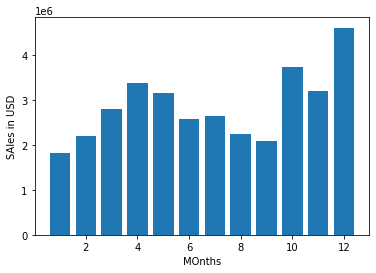

In [144]:
import matplotlib.pyplot as plt 
months = range(1,13)
plt.bar(months, result['sales'])
plt.xlabel('MOnths')
plt.ylabel('SAles in USD')
plt.show()

## QUESTION 2: Which city has the highest number of sales? 

#### Add city column 

In [158]:
all_data.dropna()
all_data.drop(index=1)


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,sales
0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,Dallas,23.90
2,2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,Boston,99.99
3,3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles,600.00
4,4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles,11.99
5,5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,Los Angeles,11.99
...,...,...,...,...,...,...,...,...,...,...
186845,11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9.0,Los Angeles,8.97
186846,11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9.0,San Francisco,700.00
186847,11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9.0,San Francisco,700.00
186848,11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9.0,San Francisco,379.99


In [196]:
def get_state():
    return all_data['Purchase Address'].str.split(',',expand =True)[2].str.split(' ', expand = True)[1]

all_data['city'] = all_data['Purchase Address'].str.split(',',expand =True)[1]+' ('+get_state()+')'
all_data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,sales
0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,Dallas (TX),23.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,Boston (MA),99.0
3,3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles (CA),600.0
4,4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles (CA),11.0
...,...,...,...,...,...,...,...,...,...,...
186845,11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9.0,Los Angeles (CA),8.0
186846,11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9.0,San Francisco (CA),700.0
186847,11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9.0,San Francisco (CA),700.0
186848,11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9.0,San Francisco (CA),379.0


In [148]:
#all_data[city]= all_data[Purchase Address].apply(lambda x: x.split(,)[1])
#https://www.youtube.com/watch?v=eMOA1pPVUc4

In [197]:
res = all_data.groupby('city').sum()
res

,Unnamed: 0,Quantity Ordered,Price Each,Month,sales
city,,,,,
Atlanta (GA),122928154,16602.0,2.779908e+06,104794.0,2784555.0
Austin (TX),82709457,11153.0,1.809874e+06,69829.0,1812297.0
Boston (MA),165758780,22528.0,3.637410e+06,141112.0,3646904.0
Dallas (TX),124308328,16730.0,2.752628e+06,104620.0,2757017.0
Los Angeles (CA),247743297,33289.0,5.421435e+06,208325.0,5430629.0
New York City (NY),208439450,27932.0,4.635371e+06,175741.0,4645903.0
Portland (ME),20641344,2750.0,4.471893e+05,17144.0,447951.0
Portland (OR),83402354,11303.0,1.860558e+06,70621.0,1863342.0
San Francisco (CA),372569180,50239.0,8.211462e+06,315520.0,8229136.0


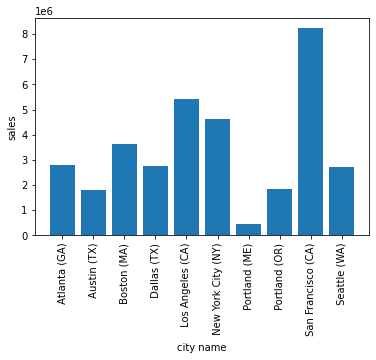

In [198]:
cities = [city for city, df in all_data.groupby('city')]
#cities = all_data['city'].sort_values(ascending=True).unique()
#all_data['city'] = all_data['city'].astype(str)
#all_data['sales'] = pd.to_numeric([all_data['sales']])
#all_data['sales'] = all_data['sales'].dropna()
import matplotlib.pyplot as plt
plt.bar(cities, res['sales'])
plt.xlabel('city name')
plt.xticks(cities, rotation='vertical', size=10 )
plt.ylabel('sales', size=10)
plt.show()

## Question 3: At what time should we display advertisements to maximize the likelihood of customer's buying product??
  

In [199]:
all_data.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,sales
0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,Dallas (TX),23.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,Boston (MA),99.0
3,3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles (CA),600.0
4,4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles (CA),11.0


#### Convert the order date string to date-time  

In [206]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) 

#### Adding a time column 

In [226]:

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head(5)



,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,sales,Hour,Minute
0,0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,Dallas (TX),23.0,8.0,46.0
2,2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,Boston (MA),99.0,22.0,30.0
3,3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles (CA),600.0,14.0,38.0
4,4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles (CA),11.0,14.0,38.0
5,5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,Los Angeles (CA),11.0,9.0,27.0


### PLOTTING A GRAPH

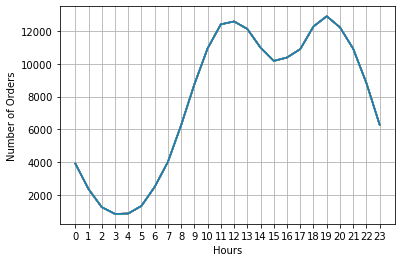

In [231]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.show()

#PEAK TIMES OF SALES ARE AROUND 11 TO 12 AM AND AT 7PM, SO IT WOULD BE BEST TO DISPLAY ADVERTISEMENTS AROUND THOSE 2 PEAK TIMES 

## QUESTION 4: What products are most often sold together?

In [253]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
d
d

In [257]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


ValueError: Length mismatch: Expected axis has 14649 elements, new values have 15193 elements

In [258]:
df = df[['Order ID', 'Grouped']].drop_duplicates()

KeyError: "['Grouped'] not in index"

In [259]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)    

KeyError: 'Grouped'

## QUESTION 5:What product sold the most? Why do you think it was sold the most 

In [268]:
total = all_data.groupby(['Product'])['Quantity Ordered'].sum()
total

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

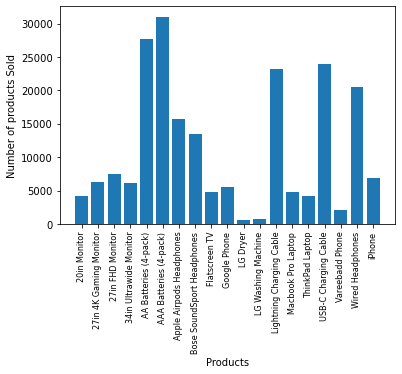

In [296]:
products = [product for product, df in all_data.groupby('Product')]

plt.bar(products, total)   
plt.xticks(products, rotation = 'vertical', size = 8)
plt.xlabel('Products')
plt.ylabel('Number of products Sold')
plt.show()

In [272]:
prices = all_data.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-295-88044aa7adea>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size=10)


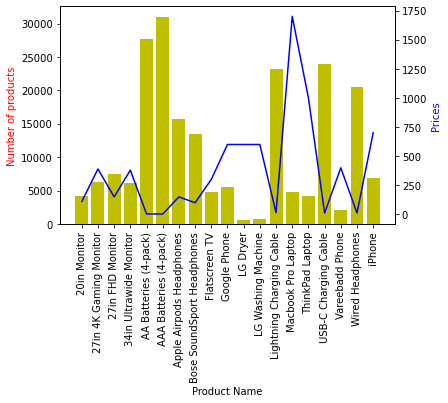

In [295]:
fig, ax1 = plt.subplots()

ax2 = aax.twtwinx()
aax1.bar(products, total, color = 'y')
aax2.plot(products, prices, 'b-)

axax1.set_xlabel('Product Name')

x1.set_ylabel('Number of products', color = 'r')

ax2.set_ylabel('Prices', color = 'b')

pax1.set_xticklabels(products, rotation = 'vertical', size=10)lplt.show()